<a href="https://colab.research.google.com/github/wordsbyanmol/Machine-Learning-Course/blob/main/mlpp24_assignment_01_Anmol_Feb15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP24 // Assignment 1 (GGD: Total = 43 / 50)**

assigned : **Feb 8, 2024**

DUE : **Feb 15, 2024 11:59pm**

## Ridership of Urban Bike Shares: the case of Citi Bike in NYC

![alt text](https://d21xlh2maitm24.cloudfront.net/nyc/01unlock2.JPG?mtime=20160428123800)

---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### OVERVIEW

Bike share programs have been implemented in cities around the world in an effort to address multiple aspects of both city functioning and quality of life for urban populations.  Traffic congestion, public health, community engagement, and air quality have all aspects of city life that could *potentially* be impacted by the introduction of a bike share program into a community.

One particularly massive bike share is New York City's [Citi Bike](https://www.citibikenyc.com/) program.  The area coverage of this program is large (extending into New Jersey across the Hudson River) and ridership initial adoption rates – as measured by the number of rides taken – were promising.  However this program has not been without controversy and there has been active discussion regarding which communities ara actually being served and which are not, who is benefitting from the availability of bikes, how they are being used for recreational vs commuter purposes, etc.

The goal of this assignment is two-fold: first, you will learn to work with basic tabular data from the Citi Bike program and second, you will generate a simple estimate for the <u>which age group is predominantly using citi bikes for commuter travel</u>.

<br>

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do you must answer YES to the question below and bear in mind that such models <u>often</u> yield incorrect and biased solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

TEXT FOR YOUR ANSWER HERE

**Did you use a generative AI model (e.g., ChatGPT) to create text or code for this assignment?**

YES or NO

---

### **PART 1 - Background**

Good data science (and data analysis more generally) as well as the appropriate application of machine learning algorithms depends on a clear understanding of the underlying problem/situation, the methods by which the data you are about to analyze are collected, and the situational context in which that data sits.  To that end:

<b>

Read through the following resources (including links within) regarding the Citi Bike program and its impacts in NYC,

1. [official Citi Bike site](https://citibikenyc.com/)

2. [DOT Facts on Citi Bike](https://www.nyc.gov/html/dot/html/pr2013/facts-on-citi-bike.shtml)

3. [Cycling in the City](https://www.nyc.gov/html/dot/downloads/pdf/cycling-in-the-city-2020.pdf)

4. [The Rise of Citi Bikes in New York City](https://thesciencesurvey.com/news/2021/03/21/the-rise-of-citi-bikes-in-new-york-city/)

</b>

### **PART 2 - Loading the data**

First things first, let's get access to the data.  To do that, we need to link this notebook with out Google Drive.  On the left there is a folder icon.  **Click that and in the popout menu click "Mount Drive" (i.e., the folder with the Google Drive icon).**  This will create a cell of code for you to run.  **Follow the instructions to link this notebook with your Google Drive.**

In [ ]:
fname= "/content/drive/Shareddrives/mlpp24/data/citibike/JC-201604-citibike-tripdata.csv"

In the menu on the left, **click the `drive` folder <small>(nb., you may need to click the folder with the refresh icon to see your `drive` folder)</small>, then `Shareddrives`, then locate the shared `mlpp24` directory**.  Inside of that is a directory called `data` and inside that is a directory called `citibike`.  In that folder is the citibike data.  **Right click on the file and select "copy path".  Put that path to the file into a string variable called `fname` and use pandas `read_csv()` function to load the data (no need to skip rows) into a pandas DataFrame called `citi`.**

In [ ]:
import pandas as pd
data= pd.read_csv(fname)
from matplotlib import pyplot as plt


In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16342 entries, 0 to 16341
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Trip Duration            16342 non-null  int64  
 1   Start Time               16342 non-null  object 
 2   Stop Time                16342 non-null  object 
 3   Start Station ID         16342 non-null  int64  
 4   Start Station Name       16342 non-null  object 
 5   Start Station Latitude   16342 non-null  float64
 6   Start Station Longitude  16342 non-null  float64
 7   End Station ID           16342 non-null  int64  
 8   End Station Name         16342 non-null  object 
 9   End Station Latitude     16342 non-null  float64
 10  End Station Longitude    16342 non-null  float64
 11  Bike ID                  16342 non-null  int64  
 12  User Type                16311 non-null  object 
 13  Birth Year               14593 non-null  float64
 14  Gender                

In [ ]:
data.head ()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1


In [ ]:
data["Gender"]


0        1
1        1
2        1
3        1
4        1
        ..
16337    1
16338    1
16339    0
16340    1
16341    1
Name: Gender, Length: 16342, dtype: int64

### **PART 3 - Calculate useful metrics**

In [ ]:
data

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,251,2016-04-30 23:33:16,2016-04-30 23:37:28,3187,Warren St,40.721124,-74.038051,3202,Newport PATH,40.727224,-74.033759,24551,Subscriber,1980.0,1
16338,220,2016-04-30 23:45:43,2016-04-30 23:49:24,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24517,Subscriber,1976.0,1
16339,346,2016-04-30 23:49:24,2016-04-30 23:55:10,3192,Liberty Light Rail,40.711242,-74.055701,3211,Newark Ave,40.721525,-74.046305,24526,Customer,NaN,0
16340,496,2016-04-30 23:51:24,2016-04-30 23:59:41,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24720,Subscriber,1977.0,1


Our end goal is to get an estimate of what age riders are using citi bikes for commuter travel the most.  <u>We're going to do that by separating the trips into short and long trips and then finding the age that has the highest fraction of short trips.</u>

Let's convert a couple columns of data into some quantities that will be useful in our model below.

First, use the values from the `"Birth Year"` column to **calculate the age of the rider.  Add those values as a column called "age" in your `citi` DataFrame**.

In [ ]:
data["Birth Year"]

0        1979.0
1        1954.0
2        1975.0
3        1981.0
4        1981.0
          ...  
16337    1980.0
16338    1976.0
16339       NaN
16340    1977.0
16341    1989.0
Name: Birth Year, Length: 16342, dtype: float64

In [ ]:
data["Age"]= 2016-data["Birth Year"]
data


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,37.0
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,62.0
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,41.0
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,35.0
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,251,2016-04-30 23:33:16,2016-04-30 23:37:28,3187,Warren St,40.721124,-74.038051,3202,Newport PATH,40.727224,-74.033759,24551,Subscriber,1980.0,1,36.0
16338,220,2016-04-30 23:45:43,2016-04-30 23:49:24,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24517,Subscriber,1976.0,1,40.0
16339,346,2016-04-30 23:49:24,2016-04-30 23:55:10,3192,Liberty Light Rail,40.711242,-74.055701,3211,Newark Ave,40.721525,-74.046305,24526,Customer,NaN,0,NaN
16340,496,2016-04-30 23:51:24,2016-04-30 23:59:41,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24720,Subscriber,1977.0,1,39.0


In [ ]:
data

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,37.0
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,62.0
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,41.0
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,35.0
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,251,2016-04-30 23:33:16,2016-04-30 23:37:28,3187,Warren St,40.721124,-74.038051,3202,Newport PATH,40.727224,-74.033759,24551,Subscriber,1980.0,1,36.0
16338,220,2016-04-30 23:45:43,2016-04-30 23:49:24,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24517,Subscriber,1976.0,1,40.0
16339,346,2016-04-30 23:49:24,2016-04-30 23:55:10,3192,Liberty Light Rail,40.711242,-74.055701,3211,Newark Ave,40.721525,-74.046305,24526,Customer,NaN,0,NaN
16340,496,2016-04-30 23:51:24,2016-04-30 23:59:41,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24720,Subscriber,1977.0,1,39.0


Now, extract the `"Trip Duration"` column (the units of which are seconds) and **take the logarithm of those using numpy's `log10()` function$^{\dagger}$.  Put them into a column in `citi` called "logdur".**

<i><small>$^{\dagger}$ recall that log10(x) = y where 10<sup>y</sup> = x, so if a trip duration is `t` = 100 seconds, `np.log10(t)` = 2 since 10<sup>2</sup> = 100.</small>

In [ ]:
import numpy as np

In [ ]:
data ["logdur"]=np.log10(data["Trip Duration"])
data ["logdur"]

0        3.318898
1        2.510545
2        2.587711
3        2.146128
4        2.152288
           ...   
16337    2.399674
16338    2.342423
16339    2.539076
16340    2.695482
16341    2.741939
Name: logdur, Length: 16342, dtype: float64

### **PART 4 - Visualize the data and update metrics**

In [ ]:
data

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age,logdur
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,37.0,3.318898
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,62.0,2.510545
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,41.0,2.587711
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,35.0,2.146128
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,35.0,2.152288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,251,2016-04-30 23:33:16,2016-04-30 23:37:28,3187,Warren St,40.721124,-74.038051,3202,Newport PATH,40.727224,-74.033759,24551,Subscriber,1980.0,1,36.0,2.399674
16338,220,2016-04-30 23:45:43,2016-04-30 23:49:24,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24517,Subscriber,1976.0,1,40.0,2.342423
16339,346,2016-04-30 23:49:24,2016-04-30 23:55:10,3192,Liberty Light Rail,40.711242,-74.055701,3211,Newark Ave,40.721525,-74.046305,24526,Customer,NaN,0,NaN,2.539076
16340,496,2016-04-30 23:51:24,2016-04-30 23:59:41,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24720,Subscriber,1977.0,1,39.0,2.695482


Since we're interested in trip durations, **use `citi`'s `.hist()` method to plot a histogram of the `"Trip Duration"` column of the data setting the range from 0 to 10000 seconds and using 100 bins**. **(GGD: -2 [axis labels])**

0        2084
1         324
2         387
3         140
4         142
         ... 
16337     251
16338     220
16339     346
16340     496
16341     552
Name: Trip Duration, Length: 16342, dtype: int64

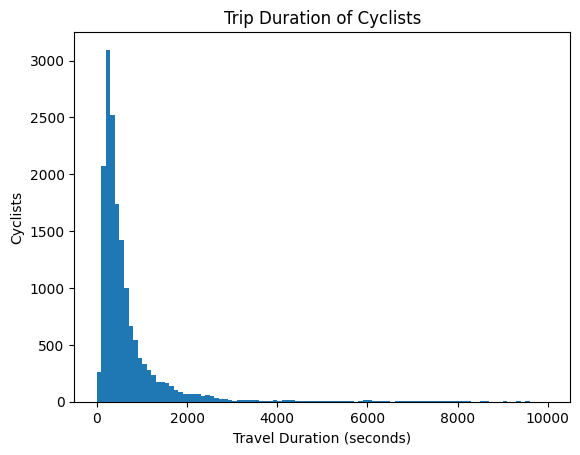

In [ ]:

hst =data ["Trip Duration"]
plt.hist(hst, 100, range=[0,10000])
plt.xlabel('Travel Duration (seconds)')
plt.ylabel('Cyclists')
plt.title('Trip Duration of Cyclists')
hst


**Would you characterize this distribution as "Gaussian"?  Why or why not?**

No. It is skewed on the left.

Now, **plot a histogram with 100 bins (no need to set the range) of the logarithm of the trip durations that you calculated above**. **(-2 [was looking for a plot of the log of the trip duration])**

(array([1.6313e+04, 1.1000e+01, 6.0000e+00, 5.0000e+00, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

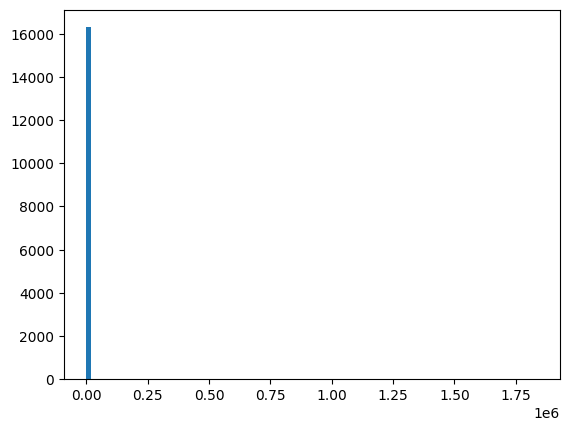

In [ ]:
hst =data ["Trip Duration"]
plt.hist(hst, 100)

**Would you characterize this distribution as Gaussian?  Why or why not?**

No, this is not Guassian. There is no spread in the data.

The previous plot might give you a sense for how to break up the rides into "short" and "long" rides (which we'll use as a proxy for "commuter" and "recreational" respectively).  **Calculate the median of the logarithm of the trip duration.** **(GGD: -1 [looks like you set `median_l` to be the value of the first element of `"logdur"` rather than that column's median])**

In [ ]:
data["logdur"].median
data["logdur"].median
median_l = 3.318
original_median = 10**median_l
original_median

2079.696687103696

We'll use this as the short/long dividing line.  **What is the duration of this trip in minutes?  Does that seem like a resonable time for commuting?  How far would you get in that time biking at 10 mph (and is that a reasonable biking speed)?** **(GGD: -3 [missing the distance and times for the median trip and discussion of whether or not these are reasonable])**

In [ ]:


data["TDM"]= data["Trip Duration"]/60
data["Distance"]= data["TDM"]*10/60
data



,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,Age,logdur,TDM,Distance
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,-74.050656,24500,Subscriber,1979.0,1,37.0,3.318898,34.733333,5.788889
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,-74.044247,24475,Subscriber,1954.0,1,62.0,2.510545,5.400000,0.900000
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,-74.049251,24503,Subscriber,1975.0,1,41.0,2.587711,6.450000,1.075000
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,-74.063784,24446,Subscriber,1981.0,1,35.0,2.146128,2.333333,0.388889
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,-74.067622,24446,Subscriber,1981.0,1,35.0,2.152288,2.366667,0.394444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,251,2016-04-30 23:33:16,2016-04-30 23:37:28,3187,Warren St,40.721124,-74.038051,3202,Newport PATH,40.727224,-74.033759,24551,Subscriber,1980.0,1,36.0,2.399674,4.183333,0.697222
16338,220,2016-04-30 23:45:43,2016-04-30 23:49:24,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,-74.043117,24517,Subscriber,1976.0,1,40.0,2.342423,3.666667,0.611111
16339,346,2016-04-30 23:49:24,2016-04-30 23:55:10,3192,Liberty Light Rail,40.711242,-74.055701,3211,Newark Ave,40.721525,-74.046305,24526,Customer,NaN,0,NaN,2.539076,5.766667,0.961111
16340,496,2016-04-30 23:51:24,2016-04-30 23:59:41,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,-74.078406,24720,Subscriber,1977.0,1,39.0,2.695482,8.266667,1.377778


In [ ]:
data["biking_speed"] = (data["Distance"] / data["Trip Duration"])*3600
#data["biking_speed"]*3600
data["biking_speed"]

0        10.0
1        10.0
2        10.0
3        10.0
4        10.0
         ... 
16337    10.0
16338    10.0
16339    10.0
16340    10.0
16341    10.0
Name: biking_speed, Length: 16342, dtype: float64

**Add two columns to your `citi` dataframe: a column called `"short_trip"` that is `True` when the trip duration is less than dividing line above and `False` otherwise, and a column called "long_trip" that is `True` when the duration is greater than or equal to the dividing line above but `False` otherwise.**

In [ ]:
data["biking_speed"].median ()

10.0

In [ ]:

import numpy as np
dividing_line= 3.318898
data["short trip"] = np.where(data["logdur"] < dividing_line, True, False)
data["long trip"] = np.where(data["logdur"] >= dividing_line, True, False)
print (data)


       Trip Duration           Start Time            Stop Time  \
0               2084  2016-04-01 00:16:13  2016-04-01 00:50:58   
1                324  2016-04-01 00:32:48  2016-04-01 00:38:13   
2                387  2016-04-01 02:00:33  2016-04-01 02:07:00   
3                140  2016-04-01 02:11:43  2016-04-01 02:14:03   
4                142  2016-04-01 02:18:01  2016-04-01 02:20:23   
...              ...                  ...                  ...   
16337            251  2016-04-30 23:33:16  2016-04-30 23:37:28   
16338            220  2016-04-30 23:45:43  2016-04-30 23:49:24   
16339            346  2016-04-30 23:49:24  2016-04-30 23:55:10   
16340            496  2016-04-30 23:51:24  2016-04-30 23:59:41   
16341            552  2016-04-30 23:56:21  2016-05-01 00:05:33   

       Start Station ID  Start Station Name  Start Station Latitude  \
0                  3203       Hamilton Park               40.727596   
1                  3202        Newport PATH               40.7272

In [ ]:
data


,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,...,User Type,Birth Year,Gender,Age,logdur,TDM,Distance,biking_speed,short trip,long trip
0,2084,2016-04-01 00:16:13,2016-04-01 00:50:58,3203,Hamilton Park,40.727596,-74.044247,3209,Brunswick St,40.724176,...,Subscriber,1979.0,1,37.0,3.318898,34.733333,5.788889,10.0,True,False
1,324,2016-04-01 00:32:48,2016-04-01 00:38:13,3202,Newport PATH,40.727224,-74.033759,3203,Hamilton Park,40.727596,...,Subscriber,1954.0,1,62.0,2.510545,5.400000,0.900000,10.0,True,False
2,387,2016-04-01 02:00:33,2016-04-01 02:07:00,3220,5 Corners Library,40.734961,-74.059503,3215,Central Ave,40.746730,...,Subscriber,1975.0,1,41.0,2.587711,6.450000,1.075000,10.0,True,False
3,140,2016-04-01 02:11:43,2016-04-01 02:14:03,3194,McGinley Square,40.725340,-74.067622,3195,Sip Ave,40.730743,...,Subscriber,1981.0,1,35.0,2.146128,2.333333,0.388889,10.0,True,False
4,142,2016-04-01 02:18:01,2016-04-01 02:20:23,3195,Sip Ave,40.730743,-74.063784,3194,McGinley Square,40.725340,...,Subscriber,1981.0,1,35.0,2.152288,2.366667,0.394444,10.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16337,251,2016-04-30 23:33:16,2016-04-30 23:37:28,3187,Warren St,40.721124,-74.038051,3202,Newport PATH,40.727224,...,Subscriber,1980.0,1,36.0,2.399674,4.183333,0.697222,10.0,True,False
16338,220,2016-04-30 23:45:43,2016-04-30 23:49:24,3209,Brunswick St,40.724176,-74.050656,3186,Grove St PATH,40.719586,...,Subscriber,1976.0,1,40.0,2.342423,3.666667,0.611111,10.0,True,False
16339,346,2016-04-30 23:49:24,2016-04-30 23:55:10,3192,Liberty Light Rail,40.711242,-74.055701,3211,Newark Ave,40.721525,...,Customer,NaN,0,NaN,2.539076,5.766667,0.961111,10.0,True,False
16340,496,2016-04-30 23:51:24,2016-04-30 23:59:41,3195,Sip Ave,40.730743,-74.063784,3193,Lincoln Park,40.724605,...,Subscriber,1977.0,1,39.0,2.695482,8.266667,1.377778,10.0,True,False


Now, we're going to use a pandas dataframe trick that is quite useful (and related to similar functionality in other data analysis software) to "group" the data "by" the age using `citi`'s `.groupby()` method.  It also needs a function to perform on the groups which outputs another data frame.  If you've accomplished the above correctly, this line of code should execute without an error:

In [ ]:
data
citig = data.groupby("Age").sum()
citig
citig. head ()

<ipython-input-24-296d7697a212>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  citig = data.groupby("Age").sum()


,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,logdur,TDM,Distance,biking_speed,short trip,long trip
Age,,,,,,,,,,,,,,,,
17.0,3393,15980,203.630178,-370.263740,15980,203.630178,-370.263740,122472,9995.0,5,13.760617,56.550000,9.425000,50.0,5,0
18.0,9242,28797,366.675084,-666.375402,28812,366.611724,-666.386814,221001,17982.0,18,27.041874,154.033333,25.672222,90.0,9,0
19.0,1125,3203,40.727596,-74.044247,3203,40.727596,-74.044247,24607,1997.0,2,3.051153,18.750000,3.125000,10.0,1,0
20.0,23395,111869,1425.350754,-2592.103091,112063,1425.279581,-2591.629175,858796,69860.0,70,95.968006,389.916667,64.986111,350.0,33,2
21.0,20720,76717,977.407891,-1776.809458,73898,977.440750,-1776.802818,590006,47880.0,26,62.197159,345.333333,57.555556,240.0,21,3


This new dataframe should now have an index that is the age groups and two columns (called "short_trip" and "long_trip") that are the sums of short and long trips for that age group.  **Get the total number of trips for that age group by adding those together.**

In [ ]:
citig["total trips"]= citig ["short trip"] + citig["long trip"]
citig
citig. head ()

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,logdur,TDM,Distance,biking_speed,short trip,long trip,total trips
Age,,,,,,,,,,,,,,,,,
17.0,3393,15980,203.630178,-370.263740,15980,203.630178,-370.263740,122472,9995.0,5,13.760617,56.550000,9.425000,50.0,5,0,5
18.0,9242,28797,366.675084,-666.375402,28812,366.611724,-666.386814,221001,17982.0,18,27.041874,154.033333,25.672222,90.0,9,0,9
19.0,1125,3203,40.727596,-74.044247,3203,40.727596,-74.044247,24607,1997.0,2,3.051153,18.750000,3.125000,10.0,1,0,1
20.0,23395,111869,1425.350754,-2592.103091,112063,1425.279581,-2591.629175,858796,69860.0,70,95.968006,389.916667,64.986111,350.0,33,2,35
21.0,20720,76717,977.407891,-1776.809458,73898,977.440750,-1776.802818,590006,47880.0,26,62.197159,345.333333,57.555556,240.0,21,3,24


**Plot the fraction of trips that are short as a function of age group.**$^{\dagger}$ **(GGD: -1 [axis labels missing])**

<small>$^{\dagger}$ you can access the index values of a dataframe like so: `age_group = citig.index`</small>

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Gender,logdur,TDM,Distance,biking_speed,short trip,long trip,total trips,age_group,short_trip_fraction
Age,,,,,,,,,,,,,,,,,,,
17.0,3393,15980,203.630178,-370.263740,15980,203.630178,-370.263740,122472,9995.0,5,13.760617,56.550000,9.425000,50.0,5,0,5,17-25,1.000000
18.0,9242,28797,366.675084,-666.375402,28812,366.611724,-666.386814,221001,17982.0,18,27.041874,154.033333,25.672222,90.0,9,0,9,17-25,1.000000
19.0,1125,3203,40.727596,-74.044247,3203,40.727596,-74.044247,24607,1997.0,2,3.051153,18.750000,3.125000,10.0,1,0,1,17-25,1.000000
20.0,23395,111869,1425.350754,-2592.103091,112063,1425.279581,-2591.629175,858796,69860.0,70,95.968006,389.916667,64.986111,350.0,33,2,35,26-35,0.942857
21.0,20720,76717,977.407891,-1776.809458,73898,977.440750,-1776.802818,590006,47880.0,26,62.197159,345.333333,57.555556,240.0,21,3,24,26-35,0.875000


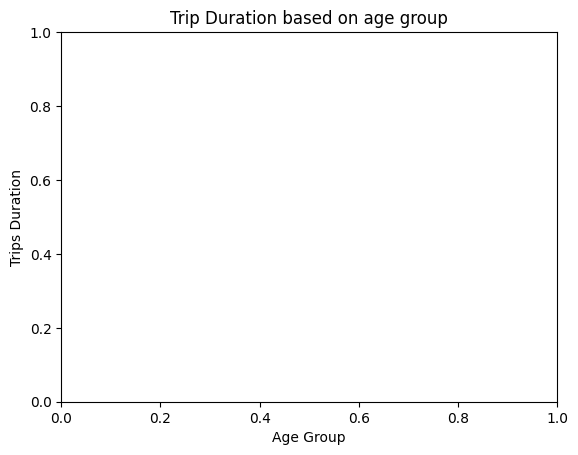

In [ ]:
data
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['17-25', '26-35', '36-45', '46-55', '56-65', '66-75']
citig["age_group"] = pd.cut(citig.index, bins=bins, labels=labels, right=False)
citig["short_trip_fraction"] = citig["short trip"] / (citig["short trip"] + citig["long trip"])

plt.xlabel('Age Group')
plt.ylabel('Trips Duration')
plt.title('Trip Duration based on age group')

citig
citig.head ()

Text(0.5, 1.0, 'Trip Duration based on age group')

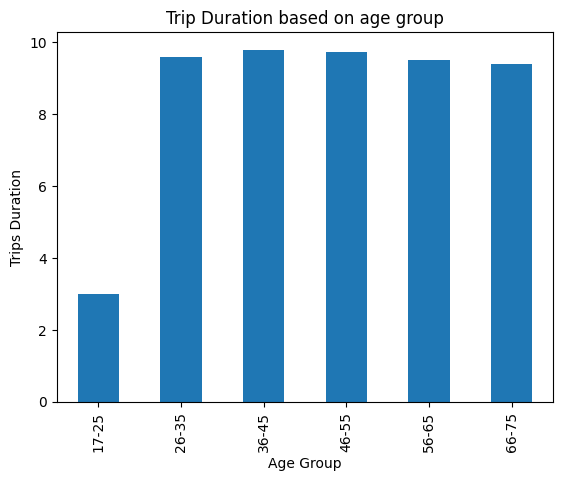

In [ ]:
citigv1= citig.groupby("age_group").sum()
citigv1['short_trip_fraction'].plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Trips Duration')
plt.title('Trip Duration based on age group')

**What is the age group that is predominantly using citi bikes for commuting?  How did you make that determination?**

In this bar, several age groups are making use of the citi bikes programme for short term commuting as a fraction of the total cummute that is less than 3.81.


```
# `# This is formatted as code`
```


```
# [`# This is formatted as code`](https://)
```

t are for less than

```
# This is formatted as code
```

. The maximum usage is by 36-45 group while 26-35 and 46-55 are also using citi bikes quite extensively.  This determination was made by dividing the commuters into age brackets. The short trips were calculates as a fraction of the total trips. Finally, the fraction of short trips across age groups were added together and a plot bar was created.

**What are the assumptions that went into finding this model?  And how do your findings relate to the information in the resources in Part 1? (GGD: OK, but note that because we did not use the `"gender"` data in our estimate of citi bike usage [purposefully!], it isn't really an assumption that has gone into the values measured here.)**

Assumptions that went into this model are that age is a determinant/driver of overall cycle usage and duration of usage. That 3.8 minutes represents a reasonable timeframe to assign a short or long duration to a cycle trip. The national average in one female for every male cyclist and this data also shows that 19.11% of the total cyclists are female aligning with the national trend.

In [ ]:
#fraction of females, males and unidentified
gender_counts = data["Gender"].value_counts()
gender_counts


1    11372
2     3154
0     1816
Name: Gender, dtype: int64

In [ ]:
female_fraction= 3154/(11372+1816+3145)*100
female_fraction


19.31059817547297

In [ ]:
unique_values = data['Gender'].unique()
print(unique_values)

[1 2 0]


In [ ]:
male_fraction= 11372/(11372+1816+3145)*100
male_fraction

69.6259107328721

In [ ]:
unidentified_fraction= 1816/(11372+1816+3145)*100
unidentified_fraction

11.118594257025654

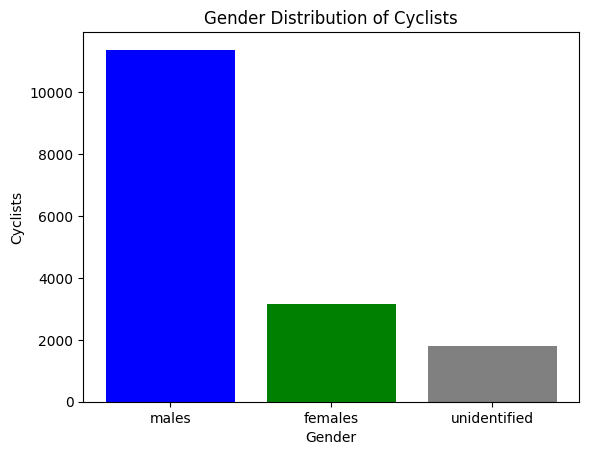

In [ ]:
#gender bar graph of cyclists
labels= ["males", "females", "unidentified"]
values = [gender_counts.get(1, 1), gender_counts.get(2, 2), gender_counts.get(0, 0)]
plt.bar(labels, values, color=['blue', 'green', 'gray'])
plt.xlabel('Gender')
plt.ylabel('Cyclists')
plt.title('Gender Distribution of Cyclists')
plt.show()

### **EXTRA CREDIT - Fit a model parameter by hand (aka: "fit by eye")**

Let's approximate the number of short trips as a function of age group by a parabola.  Here's the function we'll use:

In [ ]:
def short_by_age(age_groups, peak_age, peak_value):
  """
  Generate a model for the fraction of trips that are short as a
  function of age group.
  """

  model = -6e-4 * (age_groups - peak_age)**2 + peak_value

  return model

**Use the above function to fit the `peak_age` and `peak_value` parameters "by eye".**  By that I mean, choose some values, plot it, chose a new value and plot it to see if it fits better by eye, then repeat until you have something that looks reasonable.